In [2]:
import numpy as np
from matplotlib import pyplot as plt
import glob
from climtools import climtools_lib as ctl
import xarray as xr
from climtools import climdiags as cd

In [3]:
from importlib import reload
reload(ctl)
reload(cd)

<module 'climtools.climdiags' from '/home/fabiano/Research/git/ClimTools/climtools/climdiags.py'>

In [4]:
cart_res = '/home/fabiano/Research/lavori/WeatherRegimes/'
erafi = '/nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc'

In [5]:
modfi = '/data-hobbes/fabiano/WR_CMIP6/cmip6_ensrebase_hist/out_cmip6_ensrebase_hist_NDJFM_EAT_4clus_4pcs_1964-2014_refCLUS_dtr_reb.p'
outwr = ctl.load_wrtool(modfi)

modfi2 = '/data-hobbes/fabiano/WR_CMIP6/eceens_hist_rbtot/out_eceens_hist_rbtot_NDJFM_EAT_4clus_4pcs_1964-2014_refCLUS_dtr_reb.p'
outwr2 = ctl.load_wrtool(modfi2)

In [6]:
zip = xr.open_dataset('/nas/reference/HadCRUT/HadCRUT.5.0.2.0.analysis.anomalies.ensemble_mean.nc')

In [20]:
zip

<xarray.Dataset> Size: 44MB
Dimensions:           (time: 2097, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024...
  * latitude          (latitude) float64 288B -87.5 -82.5 -77.5 ... 82.5 87.5
  * longitude         (longitude) float64 576B -177.5 -172.5 ... 172.5 177.5
    realization       int64 8B ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 43MB ...
    time_bnds         (time, bnds) datetime64[ns] 34kB ...
    latitude_bnds     (latitude, bnds) float64 576B ...
    longitude_bnds    (longitude, bnds) float64 1kB ...
    realization_bnds  (bnds) int64 16B ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2024-11-05T11:36:43+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.2.0 HadSST.4.0.1.0
    title:        HadCRUT.5.0.2.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.2.0
    Conventions:  CF-1.7

In [14]:
resu, resu_ref = outwr
resu2, resu_ref2 = outwr2

In [ ]:
resu2['EC-Earth3_r4i1p1f1']['freq_clus_monthly'], resu2['EC-Earth3_r4i1p1f1']['freq_clus_monthly']

array([[ 0.        , 22.58064516,  0.        , 35.71428571, 12.90322581,
        10.        ,  0.        , 16.12903226, 21.42857143, 16.12903226,
        16.66666667, 29.03225806, 22.58064516, 25.        , 25.80645161,
        53.33333333, 58.06451613, 77.41935484, 42.85714286, 12.90322581,
         0.        , 19.35483871, 32.25806452, 85.71428571, 38.70967742,
        20.        , 41.93548387, 61.29032258, 32.14285714, 54.83870968,
         6.66666667, 58.06451613, 64.51612903,  3.57142857,  0.        ,
        30.        , 29.03225806, 22.58064516, 10.71428571, 54.83870968,
        20.        , 19.35483871, 22.58064516, 57.14285714, 45.16129032,
        10.        , 35.48387097, 32.25806452, 57.14285714, 38.70967742,
        10.        , 74.19354839, 29.03225806,  7.14285714, 22.58064516,
        30.        ,  3.22580645,  9.67741935, 17.85714286,  0.        ,
        33.33333333, 12.90322581,  9.67741935, 17.85714286,  6.4516129 ,
        86.66666667,  3.22580645,  0.        , 21.4

In [9]:
ece = resu['EC-Earth3_r1i1p1f1']

In [12]:
ece['freq_clus_monthly']

array([[43.33333333,  6.4516129 ,  3.22580645,  0.        ,  3.22580645,
        53.33333333, 80.64516129, 35.48387097, 60.71428571, 67.74193548,
        50.        , 22.58064516, 41.93548387, 85.71428571, 77.41935484,
        20.        , 51.61290323, 48.38709677, 60.71428571, 64.51612903,
        36.66666667, 41.93548387, 35.48387097, 35.71428571, 29.03225806,
        36.66666667, 41.93548387, 83.87096774, 50.        , 22.58064516,
        36.66666667, 29.03225806, 87.09677419, 71.42857143, 48.38709677,
        33.33333333, 54.83870968, 25.80645161, 39.28571429, 41.93548387,
        26.66666667, 25.80645161,  9.67741935, 46.42857143, 45.16129032,
        63.33333333, 22.58064516, 16.12903226, 53.57142857, 90.32258065,
        66.66666667, 64.51612903, 48.38709677, 57.14285714, 25.80645161,
         0.        , 54.83870968, 70.96774194, 64.28571429, 12.90322581,
         6.66666667, 12.90322581,  3.22580645, 85.71428571,  0.        ,
        16.66666667,  3.22580645, 38.70967742, 17.8

In [ ]:
resu_mod = cd.WRtool_from_file(modfi, 'DJF', 'EAT', sel_yr_range=(ye, ye + 20), detrend_only_global = False)

In [4]:
%matplotlib inline

In [4]:
pio = xr.open_dataset(erafi)

In [21]:
pio

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 30481, lon: 144, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 244kB 1940-01-01 1940-01-02 ... 2023-06-14
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 584B -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
Data variables:
    z        (time, lat, lon) float64 3GB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jun 21 16:55:04 2023: cdo setunit,m /nas/reference/ERA5...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

## Test variance ratio

Running precompute

Reading /nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc

Dimensions: ['time', 'lon', 'lat']

Variables: ['z']

Field as 3 dimensions and 1 vars. All vars: ['z']
Read variable: z

Selecting year range: (np.int64(1940), np.int64(1960))
cutting: 1940 12 -> 60
Calculating mean climatology

Analyzing a set of daily data..

Area:  280.0 40.0 30.0 87.5
Running compute

EOF computation took me    0.59 seconds
Running clustering

WARNING!!! ctool module not available, using algorithm <sklearn> instead of <molteni>.
k-means algorithm took me    1.85 seconds
CLUSTER 0 ---> 29.5%

CLUSTER 1 ---> 27.5%

CLUSTER 2 ---> 23.0%

CLUSTER 3 ---> 20.1%

Area:  280.0 40.0 30.0 87.5
Area:  280.0 40.0 30.0 87.5
Area:  280.0 40.0 30.0 87.5
Area:  280.0 40.0 30.0 87.5
varopt:   0.7968

all input arrays must have the same shape
Seasons are not all of the same length: 

Running precompute

Reading /nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc


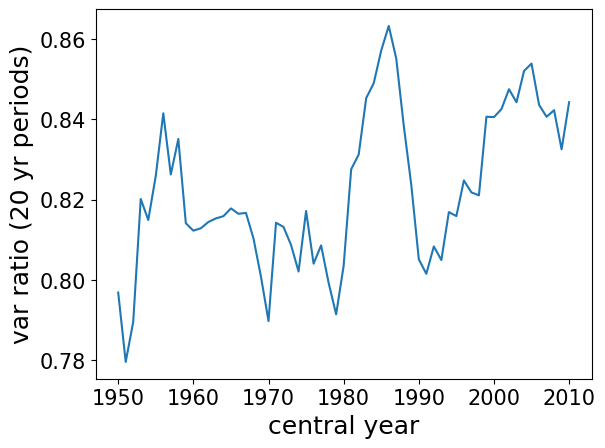

In [ ]:
var_ratios = []

syears = np.arange(1940, 2001, 1)
for ye in syears:
    resu = cd.WRtool_from_file(erafi, 'DJF', 'EAT', sel_yr_range=(ye, ye + 20), detrend_only_global = False)
    var_ratios.append(resu['var_ratio'])

fig = plt.figure()
plt.plot(syears+10, var_ratios)
plt.ylabel('var ratio (20 yr periods)')
plt.xlabel('central year')
fig.savefig('var_ratio_running.pdf')

Running precompute

Reading /nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc

Dimensions: ['time', 'lon', 'lat']

Variables: ['z']

Field as 3 dimensions and 1 vars. All vars: ['z']
Read variable: z

Selecting year range: (np.int64(1940), np.int64(1960))
cutting: 1940 12 -> 60
Calculating mean climatology

Analyzing a set of daily data..

Area:  140.0 280.0 30.0 87.5
Running compute

EOF computation took me    1.33 seconds
Running clustering

WARNING!!! ctool module not available, using algorithm <sklearn> instead of <molteni>.
k-means algorithm took me    1.82 seconds
CLUSTER 0 ---> 36.4%

CLUSTER 1 ---> 23.2%

CLUSTER 2 ---> 22.6%

CLUSTER 3 ---> 17.8%

Area:  140.0 280.0 30.0 87.5
Area:  140.0 280.0 30.0 87.5
Area:  140.0 280.0 30.0 87.5
Area:  140.0 280.0 30.0 87.5
varopt:   0.8211

all input arrays must have the same shape
Seasons are not all of the same length: 

Running precompute

Reading /nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_

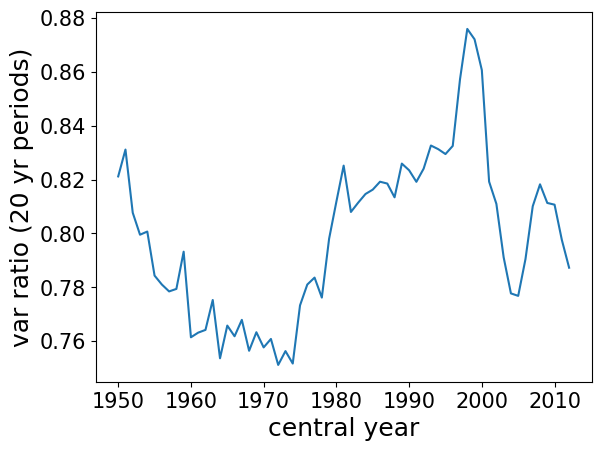

In [22]:
var_ratios = []

syears = np.arange(1940, 2003, 1)
for ye in syears:
    resu = cd.WRtool_from_file(erafi, 'DJF', 'PNA', sel_yr_range=(ye, ye + 20), detrend_only_global = False)
    var_ratios.append(resu['var_ratio'])

fig = plt.figure()
plt.plot(syears+10, var_ratios)
plt.ylabel('var ratio (20 yr periods)')
plt.xlabel('central year')
fig.savefig('var_ratio_running_PNA.pdf')

Running precompute

Reading /nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc

Dimensions: ['time', 'lon', 'lat']

Variables: ['z']

Field as 3 dimensions and 1 vars. All vars: ['z']
Read variable: z

Selecting year range: (np.int64(1940), np.int64(1960))
cutting: 1940 11 -> 91
Calculating mean climatology

Analyzing a set of daily data..

Area:  280.0 40.0 30.0 87.5
Running compute

EOF computation took me    0.74 seconds
Running clustering

WARNING!!! ctool module not available, using algorithm <sklearn> instead of <molteni>.
k-means algorithm took me    2.04 seconds
CLUSTER 0 ---> 27.9%

CLUSTER 1 ---> 25.5%

CLUSTER 2 ---> 24.3%

CLUSTER 3 ---> 22.3%

Area:  280.0 40.0 30.0 87.5
Area:  280.0 40.0 30.0 87.5
Area:  280.0 40.0 30.0 87.5
Area:  280.0 40.0 30.0 87.5
varopt:   0.7409

all input arrays must have the same shape
Seasons are not all of the same length: 

Running precompute

Reading /nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc


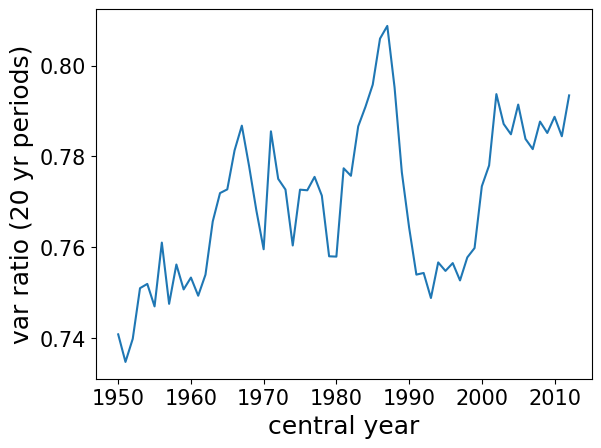

In [23]:
var_ratios = []

syears = np.arange(1940, 2003, 1)
for ye in syears:
    resu = cd.WRtool_from_file(erafi, 'NDJFM', 'EAT', sel_yr_range=(ye, ye + 20), detrend_only_global = False)
    var_ratios.append(resu['var_ratio'])

fig = plt.figure()
plt.plot(syears+10, var_ratios)
plt.ylabel('var ratio (20 yr periods)')
plt.xlabel('central year')
fig.savefig('var_ratio_running_EAT_NDJFM.pdf')

In [15]:
var_ratios = var_ratios[:-4]

In [14]:
len(np.arange(1950, 2011, 5))

13

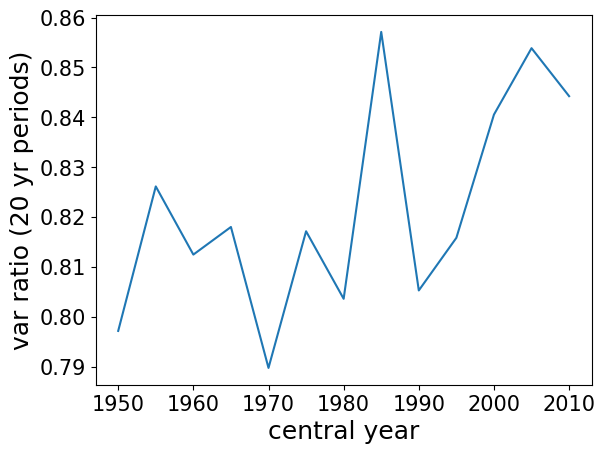

In [16]:
fig = plt.figure()
plt.plot(np.arange(1950, 2011, 5), var_ratios)
plt.ylabel('var ratio (20 yr periods)')
plt.xlabel('central year')
fig.savefig('var_ratio_running.pdf')


## 2 regimes

Running precompute

Reading /nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc



Dimensions: ['time', 'lon', 'lat']

Variables: ['z']

Field as 3 dimensions and 1 vars. All vars: ['z']
Read variable: z

Selecting year range: (np.int64(1940), np.int64(1960))
cutting: 1940 12 -> 60
Calculating mean climatology

Analyzing a set of daily data..

Area:  280.0 40.0 30.0 87.5
Running compute

EOF computation took me    0.94 seconds
Running clustering

WARNING!!! ctool module not available, using algorithm <sklearn> instead of <molteni>.
k-means algorithm took me    0.85 seconds
CLUSTER 0 ---> 53.4%

CLUSTER 1 ---> 46.6%

Area:  280.0 40.0 30.0 87.5
Area:  280.0 40.0 30.0 87.5
varopt:   0.3402

all input arrays must have the same shape
Seasons are not all of the same length: 

Running precompute

Reading /nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc

Dimensions: ['time', 'lon', 'lat']

Variables: ['z']

Field as 3 dimensions and 1 vars. All vars: ['z']
Read variable: z

Selecting year range: (np.int64(1941), np.int64(1961))
cutting: 1941 12 -> 59


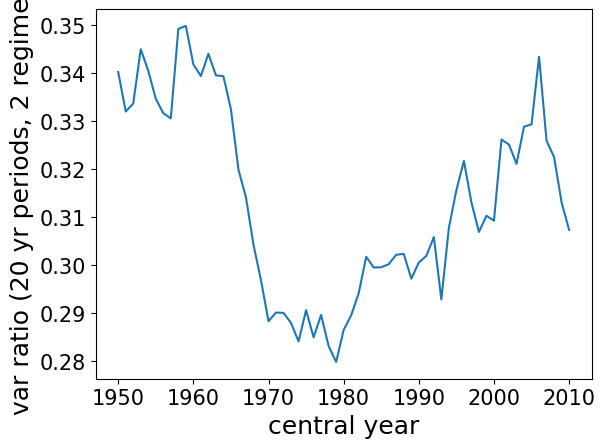

In [7]:
var_ratios = []

syears = np.arange(1940, 2001, 1)
for ye in syears:
    resu = cd.WRtool_from_file(erafi, 'DJF', 'EAT', numclus = 2, sel_yr_range=(ye, ye + 20), detrend_only_global = False)
    var_ratios.append(resu['var_ratio'])

fig = plt.figure()
plt.plot(syears+10, var_ratios)
plt.ylabel('var ratio (20 yr periods, 2 regimes)')
plt.xlabel('central year')
fig.savefig('var_ratio_running_2regimes.pdf')

In [9]:
resu['var_ratio']

np.float64(0.9613840969757119)

12256557.833439022
clevels specified directly, ignoring info on cbar_range and color_percentiles
Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point



[<Figure size 1080x864 with 5 Axes>]

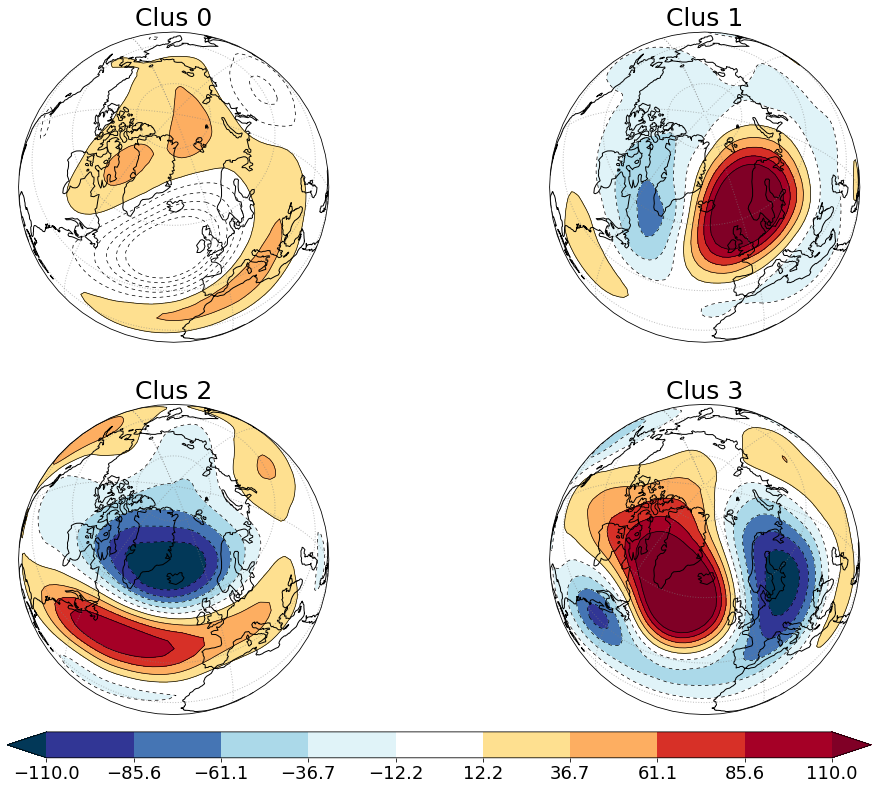

In [13]:
cd.plot_regimes(resu['lat'], resu['lon'], resu['cluspattern'], None)

In [3]:
resfil = '/data-hobbes/fabiano/WR_CMIP6/ERA_ref_r25_v4/out_ERA_NDJFM_EAT_4clus_4pcs_1964-2014_dtr.p'

In [4]:
res = ctl.load_wrtool(resfil)

In [6]:
res['freq_clus']

array([31.70860927, 25.17880795, 23.01986755, 20.09271523])